In [15]:

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
import pandas as pd
import numpy as np
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from sympy import Rational as R
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML


In [12]:
# Let us create a UDF which will enable us to shade areas under the curve for standardnormal distribution

def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(z, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [14]:
# Let us create a UDF which will enable us to shade areas under the curve for t-distribution

def draw_t_score(x, df, cond, mu, sigma, title):
    y = t.pdf(x, df, mu, sigma)
    t = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(t, t.pdf(t, df, mu, sigma))
    plt.title(title)
    plt.show()

## Problems 6
The first five exercises er from today’s topics. Do these first. The rest is a bit of everything, including
covariance and correlation which we did not do exercises in yet.

## Exercise 1 Book(ASPE: 8.1.7) </br>
A manufacturer produces piston rings for an automo-
bile engine. It is known that ring diameter is normally distributed
with σ = 0.001 millimeters. A random sample of 15 rings has a
mean diameter of. </br>
n=15 ; $\sigma$ = 0.001 mm ; $\overline{x}$ = 74.036 mm

**a)** Construct a 99% two-sided confidence interval on the
mean piston ring diameter. </br>

Two sided CI formula </br>
Upper: $\overline{x}$ + $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ 

99%: $z_{1- \frac{\alpha}{2}}$ = 2.58
$\sigma$:
Upper: 74.036 + 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>
Lower: 74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>

74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ $\leq$ $\mu$ $\leq$ 74.036 + 2.58 *  $\frac{0.001}{\sqrt{15}}$


A 99.0 % confidence interval for the sample mean is [74.0353 ; 74.0367]


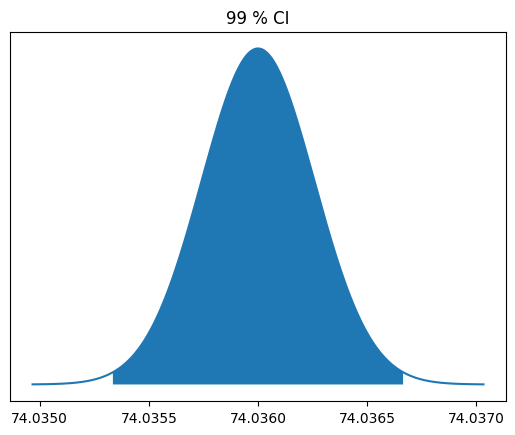

In [16]:

sigma = 0.001
n = 15
SE = sigma/np.sqrt(n)
mean = 74.036
Level = 0.99

CI = norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), mean, SE, '99 % CI')

**b)** Construct a 99% lower-confidence bound on the mean
piston ring diameter. Compare the lower bound of this confi-
dence interval with the one in part (a). </br>

Two sided CI formula </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>

99%: $z_{1- \alpha}$ = 2.33 </br>
n=15 </br> $\sigma$ = 0.001 mm </br> $\overline{x}$ = 74.036 mm </br> $\alpha$ = 0.01

Lower: 74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>

74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ $\leq$ $\mu$


A 99.0 % lower confidence interval for the sample mean is 74.035399 < μ 


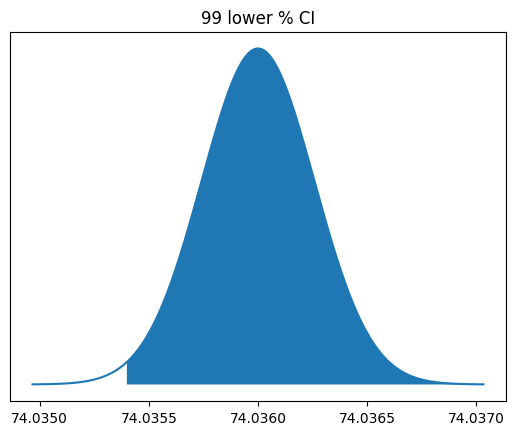

In [19]:

sigma = 0.001
n = 15
SE = sigma/np.sqrt(15)
mean = 74.036
Level = 0.98 ## Please notice THIS / since we taking in consideration just one side we have to take the full alpha(error) which is 1 % => aplha = 2%

CI = norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100+1) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],6)) + ' < \u03bc ')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_z_score(x, CI[0] <= x, mean, SE, '99 lower % CI')

## Exercise 2 Book(ASPE: 8.1.8) </br>
A civil engineer is analyzing the compressive strength of concrete. Compressive strength is normally distributed  with $σ^2 = 1000(psi)^2$ . A random sample of 12 specimens has a mean compressive strength of $\overline{x}$ = 3250 psi. </br>
n=12 ; $\sigma =  \sqrt{1000(psi)^2}$; $\overline{x}$ = 3250 psi

**a)** Construct a 95% two-sided confidence interval on mean compressive strength. </br>

Two sided CI formula </br>
Upper: $\overline{x}$ + $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ 

95%: $z_{1- \frac{\alpha}{2}}$ = 1.96 </br>
Upper: 3250 + 1.96 *  $\frac{10}{\sqrt{12}}$ </br>
Lower: 3250 - 1.96 *  $\frac{10}{\sqrt{12}}$ </br>

3250 - 1.96 *  $\frac{0.001}{\sqrt{12}}$ $\leq$ $\mu$ $\leq$ 3250 + 1.96 *  $\frac{0.001}{\sqrt{12}}$ 


A 95.0 % confidence interval for the sample mean is [3232.1081 ; 3267.8919]


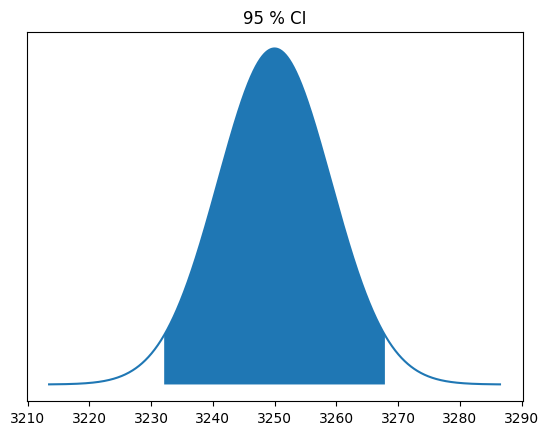

A 95.0 % confidence interval for the sample mean is [3232.1081 ; 3267.8919]


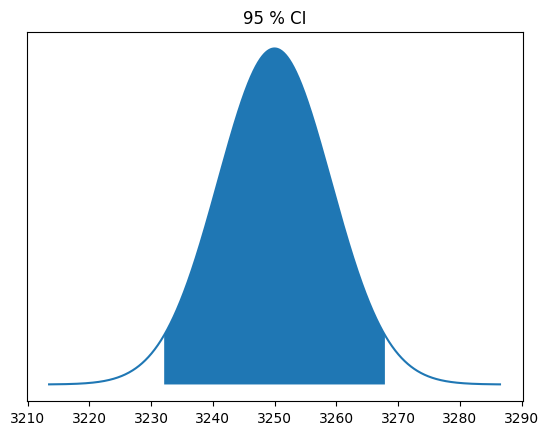

In [23]:

sigma = np.sqrt(1000)
n = 12
SE = sigma/np.sqrt(n)
mean = 3250
Level = 0.95

CI = norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), mean, SE, '95 % CI')
n = 12
SE = sigma/np.sqrt(n)
mean = 3250
Level = 0.95

CI = norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), mean, SE, '95 % CI')

**b)** Construct a 99% two-sided confidence interval on mean compressive strength. Compare the width of this confidence interval with the width of the one found in part (a). </br>

Two sided CI formula </br>
Upper: $\overline{x}$ + $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ 

99%: $z_{1- \frac{\alpha}{2}}$ = 2.58 </br>
Upper: 3250 + 2.58 *  $\frac{10}{\sqrt{12}}$ </br>
Lower: 3250 - 2.58 *  $\frac{10}{\sqrt{12}}$ </br>

3250 - 2.58 *  $\frac{10}{\sqrt{12}}$ $\leq$ $\mu$ $\leq$ 3250 + 2.58 *  $\frac{10}{\sqrt{12}}$ 


A 99.0 % confidence interval for the sample mean is [3226.486 ; 3273.514]


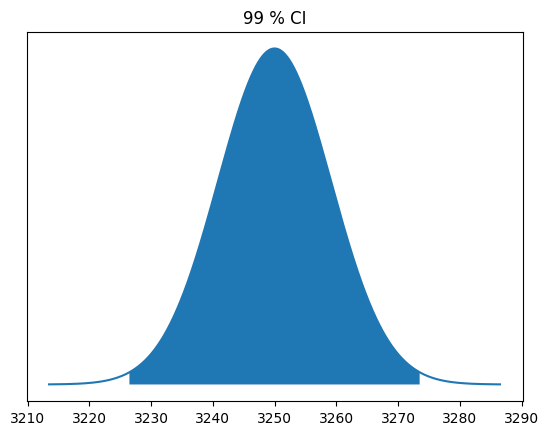

In [25]:

sigma = np.sqrt(1000)
n = 12
SE = sigma/np.sqrt(n)
mean = 3250
Level = 0.99

CI = norm.interval(Level, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), mean, SE, '99 % CI')